In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
#from datetime import datetime as dt
import sys
#path_file = ('D:\\Laura_Rojas_Gonzalez\\SimpleSpace\\Datamanager\\')
#sys.path.append(path_file)
#from datamanager import DataManager
#path_file = ('D:\\Laura_Rojas_Gonzalez\\SimpleSpace\\Calibrator\\')
#sys.path.append(path_file)
#from calibrator import Calibrator
import matplotlib.pyplot as plt
#import matplotlib.dates as mdates
import os
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker
from matplotlib.lines import Line2D
from PyPDF2 import PdfFileMerger
%matplotlib inline

In [4]:
path_general = 'D:\\Laura_Rojas_Gonzalez\\SimpleSpace\\Siberia\\Datos_Siberia\\'

#Obtenemos una lista del nombre de los archivos dentro de la carpeta
list_name = os.listdir(path_general)

#Iteramos para abrir cada archivo y concatenamos para tener un solo df

df_total = []
for file in list_name:
    load_file = pd.read_csv(f'{path_general}{file}')
    df_total.append(load_file)
df_total = pd.concat(df_total)

#Convierte la presion_barometro de Pa a hPa
df_total['presion_barometro']=df_total['presion_barometro']/100

In [7]:
df_total.rename(columns = {'PM2.5' : 'PM2_5'}, inplace = True)

In [203]:
df_total.NO2.min()

54.84

In [191]:
 def graphic(data, variable, unit, minvar=0, maxvar=1000, 
                        shape_figs = (1,1),  position = [0,0] ,color = '#056674', fig=plt.figure(figsize=(10,5))):

        fig = fig
        gs = gridspec.GridSpec(shape_figs[0],shape_figs[1])
    
        ax1=fig.add_subplot(gs[position[0],position[1]])
        ax1.plot(data.index,data.loc[:, variable].values,'-',lw=1,label= variable,color=color)
        
        ax1.set_ylim(minvar,maxvar)
        ax1.set_xlim(data.index[0], data.index[-1])
        
        ax1.tick_params(axis = 'y',color='gray', labelcolor='gray', labelsize=15)
        ax1.tick_params(axis = 'x',color='gray', labelcolor='gray', labelsize=13)
        
        ax1.grid(which='major',  linestyle='--', linewidth=0.5, color='lightgray')
        
        ax1.set_ylabel(f"{unit}", fontsize=20,  color='gray')
        ax1.set_xlabel("Cuentas", fontsize=20, color='gray')
        
        plt.legend(loc= 0, fontsize = 20)
        plt.tight_layout()
        
        return fig

<Figure size 720x360 with 0 Axes>

C:\Anaconda\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


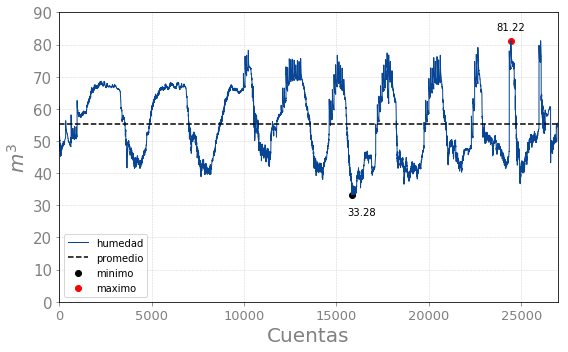

In [210]:
fig =plt.figure(figsize=(8,5))
fig_1 = graphic(df_total,'humedad',r'$m^{3}$',0,90,color='#084594',fig=fig)

min_x = np.argmin(df_total['humedad'])
min_y = np.min(df_total['humedad'])
min_y = round(min_y,2)

max_x = np.argmax(df_total['humedad'])
max_y = np.max(df_total['humedad'])
max_y = round(max_y,2)

plt.scatter(min_x, min_y,c='k',label='minimo')
plt.scatter(max_x, max_y,c='r',label='maximo')

plt.annotate(min_y,(min_x,min_y),textcoords="offset points",xytext=(10,-20),ha='center')
plt.annotate(max_y,(max_x,max_y),textcoords="offset points",xytext=(0,10),ha='center')

plt.axhline(y=np.nanmean(df_total['humedad']),color='k', lw=1.5, ls='--', label="promedio")

plt.legend(loc=0)
plt.show()

In [102]:
#Para ver los minvar y maxvar de cada variable (automatizar)
print(df_total['temperatura'].min())
print(df_total['temperatura'].max())
print(df_total['temperatura'].mean())

15.43
41.99
25.897678148148405


C:\Anaconda\lib\site-packages\matplotlib\tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '
C:\Anaconda\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
C:\Anaconda\lib\site-packages\matplotlib\tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '
C:\Anaconda\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


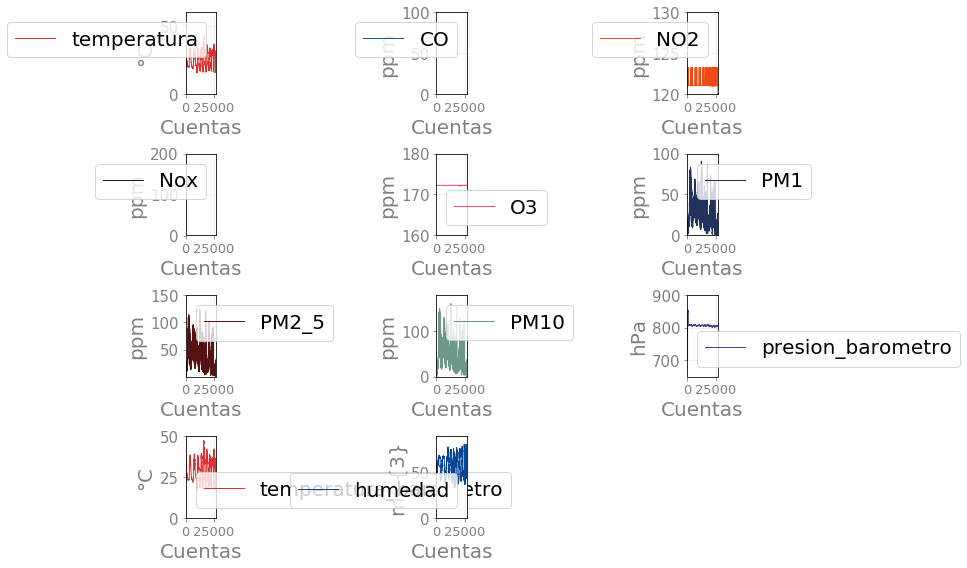

In [118]:
#gs = gridspec.GridSpec(4,3) #(filas, columnas)
fig=plt.figure(figsize=(10,8))

Temp = graphic(df_total,shape_figs=(4,3),position=[0,0],fig = fig,
                           variable = 'temperatura',minvar = 0,maxvar = 60,unit='°C',color = '#DF2E2E')
CO = graphic(df_total,shape_figs=(4,3),position=[0,1],fig = fig,
                         variable = 'CO',minvar = 0,maxvar = 100,unit='ppm',color = '#056674')
NO2 = graphic(df_total,shape_figs=(4,3),position=[0,2],fig = fig,
                          variable = 'NO2',minvar = 120,maxvar = 130,unit='ppm',color = '#F14A16')
NOx = graphic(df_total,shape_figs=(4,3),position=[1,0],fig = fig,
                          variable = 'Nox',minvar = 1,maxvar = 200,unit='ppm',color = '#072227')
O3 = graphic(df_total,shape_figs=(4,3),position=[1,1],fig = fig,
                         variable = 'O3',minvar = 160,maxvar = 180,unit='ppm',color = '#FF4B5C')
PM1 = graphic(df_total,shape_figs=(4,3),position=[1,2],fig = fig,
                           variable = 'PM1',minvar = 0,maxvar = 100,unit='ppm',color = '#21325E')
PM2_5 = graphic(df_total,shape_figs=(4,3),position=[2,0],fig = fig,
                            variable = 'PM2_5',minvar = 1,maxvar = 150,unit='ppm',color = '#541212')
PM10 = graphic(df_total,shape_figs=(4,3),position=[2,1],fig = fig,
                           variable = 'PM10',minvar = 0,maxvar = 180,unit='ppm',color = '#6D9886')
Press = graphic(df_total,shape_figs=(4,3),position=[2,2],fig = fig,
                            variable = 'presion_barometro',minvar = 650,maxvar = 900,unit='hPa',color = '#533E85')
Temp_B = graphic(df_total,shape_figs=(4,3),position=[3,0],fig = fig,
                           variable = 'temperatura_barometro',minvar = 0,maxvar = 50,unit='°C',color = '#FFB344')
Hum = graphic(df_total, shape_figs=(4,3), position=[3,1],fig = fig,
                         variable = 'humedad',minvar = 0,maxvar = 90,unit='m^{3}',color = '#084594')

plt.subplots_adjust(left=0.1, bottom=0.1, right=2.5,top=2,wspace=0.2,hspace=0.4)

path_save = 'D:\\Laura_Rojas_Gonzalez\\SimpleSpace\\Reporte_MinCiencias'
plt.savefig(f'{path_save}Serie_Siberia.png',bbox_inches="tight",
                                                    dpi = 200)

C:\Anaconda\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


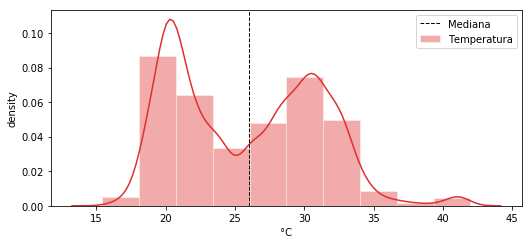

C:\Anaconda\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


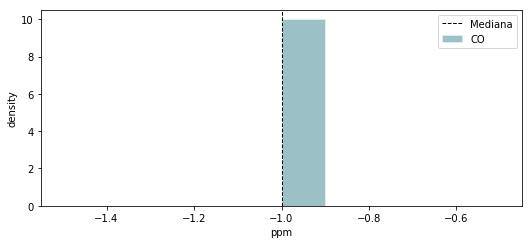

C:\Anaconda\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


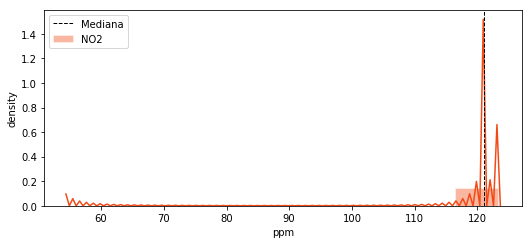

C:\Anaconda\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


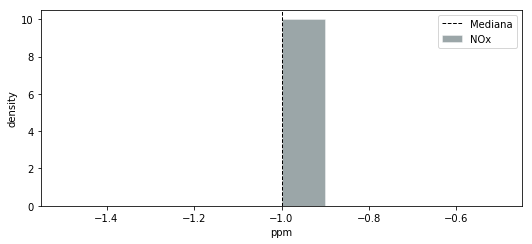

C:\Anaconda\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


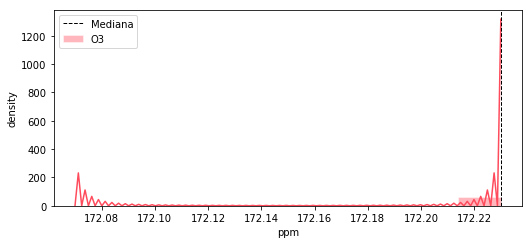

C:\Anaconda\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


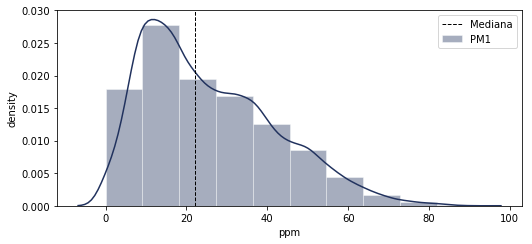

C:\Anaconda\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


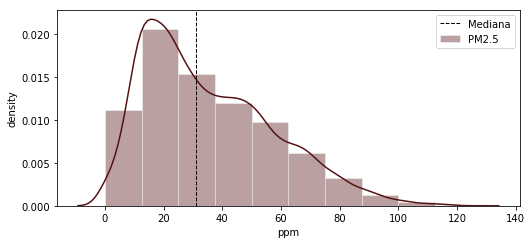

C:\Anaconda\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


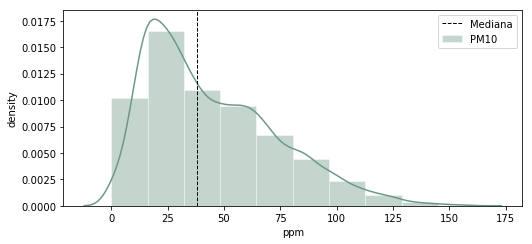

C:\Anaconda\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


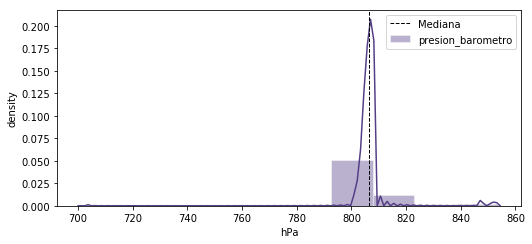

C:\Anaconda\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


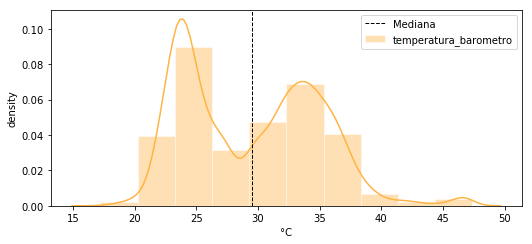

C:\Anaconda\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


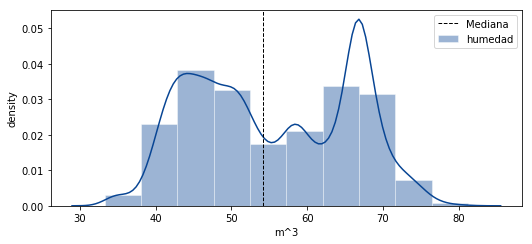

In [189]:
temphist = sns.distplot(a=df_total.temperatura, color='#DF2E2E',hist_kws={"edgecolor": 'white'}, bins=10)
temphist.set(ylabel='density',xlabel='°C')
temphist.axvline(df_total.temperatura.median(), color='k', ls='--', lw=1)
plt.legend(['Mediana', 'Temperatura'])

plt.show()

cohist = sns.distplot(a=df_total.CO, color='#056674',hist_kws={"edgecolor": 'white'}, bins=10)
cohist.set(ylabel='density',xlabel='ppm')
cohist.axvline(df_total.CO.median(), color='k', ls='--', lw=1)
plt.legend(['Mediana', 'CO'])

plt.show()

no2hist = sns.distplot(a=df_total.NO2, color='#F14A16',hist_kws={"edgecolor": 'white'}, bins=10)
no2hist.set(ylabel='density',xlabel='ppm')
no2hist.axvline(df_total.NO2.median(), color='k', ls='--', lw=1)
plt.legend(['Mediana', 'NO2'])

plt.show()

noxhist = sns.distplot(a=df_total.Nox, color='#072227',hist_kws={"edgecolor": 'white'}, bins=10)
noxhist.set(ylabel='density',xlabel='ppm')
noxhist.axvline(df_total.Nox.median(), color='k', ls='--', lw=1)
plt.legend(['Mediana', 'NOx'])

plt.show()

o3hist = sns.distplot(a=df_total.O3, color='#FF4B5C',hist_kws={"edgecolor": 'white'}, bins=10)
o3hist.set(ylabel='density',xlabel='ppm')
o3hist.axvline(df_total.O3.median(), color='k', ls='--', lw=1)
plt.legend(['Mediana', 'O3'])

plt.show()

pm1hist = sns.distplot(a=df_total.PM1, color='#21325E',hist_kws={"edgecolor": 'white'}, bins=10)
pm1hist.set(ylabel='density',xlabel='ppm')
pm1hist.axvline(df_total.PM1.median(), color='k', ls='--', lw=1)
plt.legend(['Mediana', 'PM1'])

plt.show()

pm2_5hist = sns.distplot(a=df_total.PM2_5, color='#541212',hist_kws={"edgecolor": 'white'}, bins=10)
pm2_5hist.set(ylabel='density',xlabel='ppm')
pm2_5hist.axvline(df_total.PM2_5.median(), color='k', ls='--', lw=1)
plt.legend(['Mediana', 'PM2.5'])

plt.show()

pm10hist = sns.distplot(a=df_total.PM10, color='#6D9886',hist_kws={"edgecolor": 'white'}, bins=10)
pm10hist.set(ylabel='density',xlabel='ppm')
pm10hist.axvline(df_total.PM10.median(), color='k', ls='--', lw=1)
plt.legend(['Mediana', 'PM10'])

plt.show()

pbhist = sns.distplot(a=df_total.presion_barometro, color='#533E85',hist_kws={"edgecolor": 'white'}, bins=10)
pbhist.set(ylabel='density',xlabel='hPa')
pbhist.axvline(df_total.presion_barometro.median(), color='k', ls='--', lw=1)
plt.legend(['Mediana', 'presion_barometro'])

plt.show()

tbhist = sns.distplot(a=df_total.temperatura_barometro, color='#FFB344',hist_kws={"edgecolor": 'white'}, bins=10)
tbhist.set(ylabel='density',xlabel='°C')
tbhist.axvline(df_total.temperatura_barometro.median(), color='k', ls='--', lw=1)
plt.legend(['Mediana', 'temperatura_barometro'])

plt.show()

humhist = sns.distplot(a=df_total.humedad, color='#084594',hist_kws={"edgecolor": 'white'}, bins=10)
humhist.set(ylabel='density',xlabel='m^3')
humhist.axvline(df_total.humedad.median(), color='k', ls='--', lw=1)
plt.legend(['Mediana', 'humedad'])

plt.show()